In [1]:
import pandas as pd 
from surprise import Dataset, Reader
from surprise.model_selection import \
    train_test_split, GridSearchCV, cross_validate
from surprise import accuracy
import numpy as np
from surprise.similarities import cosine
from surprise.prediction_algorithms.knns import \
    KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import SVD,SlopeOne
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [2]:
# Laod data
data=pd.read_csv('data.csv')
df=data[['user_id','item_id','recommend']]

In [3]:
# Convert df into Surprise object
reader=Reader(rating_scale=(0,1))
data=Dataset.load_from_df(df,reader=reader)

In [4]:
# Split data into training and testing set
trainset, testset = train_test_split(data, test_size=0.3)

In [5]:
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items, '\n')

Number of users:  18853 

Number of items:  2573 



In [6]:
# Compute RMSE of KNNBasic
my_sim_option={'name':'cosine','user_based':False}
algo=KNNBasic(sim_option=my_sim_option)
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [7]:
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.3171


0.31709680888373964

In [25]:
# Create tunning parameter
k=[10,20,30]
min_k=[2,3,4]

In [ ]:
# Define Tunning function
def tunning(algo_name, default):
    default_rmse=default
    for i in k:
        for j in min_k:
            algo=algo_name(sim_option=my_sim_option, k=i, min_k=j)
            algo.fit(trainset)
            predictions=algo.test(testset)
            if accuracy.rmse(predictions) < default_rmse:
                default_rmse=accuracy.rmse(predictions)
            else:
                continue
    return str(algo_name)+' Tunned RMSE: '+str(default_rmse)

In [23]:
# Tune KNNBasic
tunning(KNNBasic,0.3171)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3096
RMSE: 0.3096
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3076
RMSE: 0.3076
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3077
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3092
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3073
RMSE: 0.3073
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3073
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3091
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3071
RMSE: 0.3071
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3072


"<class 'surprise.prediction_algorithms.knns.KNNBasic'> Tunned RMSE: 0.30712258615151067"

In [17]:
# KNNWithMeans
algo=KNNWithMeans(sim_option=my_sim_option)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3402


0.34023834910325856

In [20]:
# Tune KNNWithMeans
tunning(KNNWithMeans, 0.3402)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3386
RMSE: 0.3386
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3388
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3394
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3387
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3390
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3395
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3389
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3392
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3397


"<class 'surprise.prediction_algorithms.knns.KNNWithMeans'> Tunned RMSE: 0.33859996905240886"

In [21]:
# KNNWithZScore
algo=KNNWithZScore(sim_option=my_sim_option)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3399


0.3399419104292489

In [22]:
# Tune KNNWithZScore
tunning(KNNWithZScore, 0.3399)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3392
RMSE: 0.3392
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3394
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3399
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3394
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3396
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3400
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3396
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3398
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3402


"<class 'surprise.prediction_algorithms.knns.KNNWithZScore'> Tunned RMSE: 0.3392406647363043"

In [14]:
# Compute RMSE of SVD
algo=SVD()
algo.fit(trainset)

In [15]:
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.2920


0.292010475735039

In [26]:
# Setup Tunning Parameters
n_epochs=[5,10,15]
lr_all=[0.001,0.002,0.004]

In [27]:
# Tune SVD
default_rmse=0.2920
for i in n_epochs:
    for j in lr_all:
        algo=SVD(n_epochs=i,lr_all=j)
        algo.fit(trainset)
        predictions=algo.test(testset)
        if accuracy.rmse(predictions) < default_rmse:
            default_rmse=accuracy.rmse(predictions)
        else:
            continue
print('SVD Tunned RMSE: '+str(default_rmse))

RMSE: 0.3085
RMSE: 0.3056
RMSE: 0.3021
RMSE: 0.3049
RMSE: 0.3009
RMSE: 0.2989
RMSE: 0.3034
RMSE: 0.2997
RMSE: 0.2971
SVD Tunned RMSE: 0.292


In [16]:
# Compute RMSE of SlopeOne
algo=SlopeOne()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.3394


0.3394398071037379

In [28]:
# Put results in a dataframe
model_score={
    'KNNBasic':0.3071,
    'KNNWithMeans':0.3385,
    'KNNWithZScore':0.3392,
    'SVD':0.2920,
    'SlopeOne':0.3394
}
models_rmse=pd.DataFrame(model_score.items(),columns=['Models','RMSE'])

Text(0.5, 1.0, 'RMSE of Each Models')

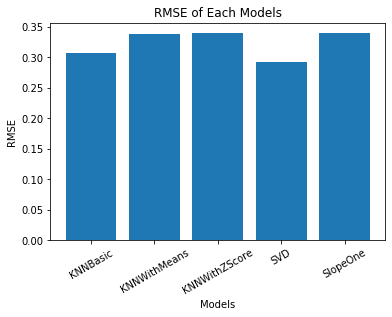

In [29]:
# Plot the results
plt.bar(x='Models',height='RMSE',data=models_rmse)
plt.xticks(rotation=30)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE of Each Models')